Data Retrieved from: https://archive.ics.uci.edu/dataset/2/adult

As was the second Jupyter cell ( Import in Python button on that page)

# Goal and Introduction

The goal is to use this dataset to try to predict if someone makes over 50,000 dollar a year using a variety of variables such as occupation, age, education. There is a mix of categorial and integer types which provides a variety of ways to probe and analyze the data. Additionally, the sheer amount of variables also adds to the possible avenues for analysis.

Since this is a binary classification problem ( someone either makes more or less than/ equal to 50,000 dollars), there are a handful of possible alogrithms such as k-Nearest Neighbors, Logistic Regression, and Decision Trees. 

## General Outline

* Fix the missing values ( and change the targets to be integers)
* Prod the data using some basic statistics like correlations, and some graphing
* Pick a ML model that works well for binary classification and implement it
* Discuss the Results

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

## Step 1: Data Cleaning

There isn't that much cleaning to do. The page on UCI's archive does say there are missing values so those will be converted to *Numpy's* **Nan** type for the sake of compatibility. This is marginally beneficial especially since missing values were only represented by question marks. 

There is the additional problem that the targets have not 2, but 4 different variables represented. 

*workclass* will be used as the example variable to show the change in the missing values.

In [3]:
X['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [4]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [5]:
X = X.replace('?', np.nan)
y = y.replace('<=50K.', '<=50K')
y = y.replace('>50K.', '>50K')

In [6]:
X['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
y.value_counts()

income
<=50K     37155
>50K      11687
Name: count, dtype: int64

## Step 2: Preliminary Analysis

A nice first step would be to see how each variable is distributed. Normal distributions tend to be better for Machine Learning models, but it should be fine regardless. 

The target varaible should be converted to an integer so it can be used with the **corr** method. This will give some simple insight into how the data is connected, though it should be noted that it gives no insight into categorical variables like *occupation*.

After this, it will be time to pick a model and implement it.

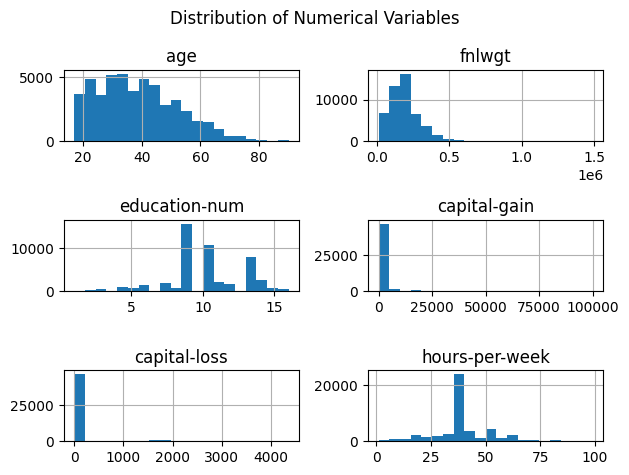

In [13]:
X.hist(bins=20)
plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout()

In [8]:
yInt = y.replace('<=50K', 0)
yInt = yInt.replace('>50K', 1)
JointInt = X.join(yInt)
JointInt.corr(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000
